In [1]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
from classy import Class
from plancklens import utils
import os
from os.path import join as opj

In [25]:
plm = hp.read_alm("/scratch/snx3000/odarwish/JOINTRECONSTRUCTION/alpha_phi_cmb_new_rot/simswalpha/"+"sim_0014_plm.fits")
alm = hp.read_alm("/scratch/snx3000/odarwish/JOINTRECONSTRUCTION/alpha_phi_cmb_new_rot/simswalpha/"+"sim_0014_alpha_lm.fits")
rec = np.load("/scratch/snx3000/odarwish/JOINTRECONSTRUCTION/alpha_phi_cmb_new_rot_version_alpha_phi_omega_lmax_4000_new_rot_low_noise_recs/p_p_sim0014alpha_phi_omega_lmax_4000_new_rot_low_noise/alm0_norm.npy")

In [27]:
alm = utils.alm_copy(alm, 5000)
plm = utils.alm_copy(plm, 5000)

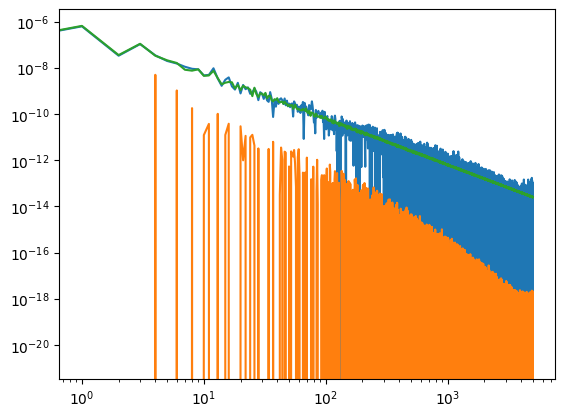

In [36]:
plt.loglog(hp.alm2cl(rec, alm))
plt.loglog(hp.alm2cl(rec, plm))
plt.loglog(hp.alm2cl(alm))

In [15]:
blm = hp.read_alm("/scratch/snx3000/odarwish/JOINTRECONSTRUCTION/alpha_phi_cmb_new_rot/simswalpha/"+"sim_0014_blm.fits")
elm = hp.read_alm("/scratch/snx3000/odarwish/JOINTRECONSTRUCTION/alpha_phi_cmb_new_rot/simswalpha/"+"sim_0014_elm.fits")

In [23]:
blm_p = hp.read_alm("/scratch/snx3000/odarwish/JOINTRECONSTRUCTION/phi_cmb/simswalpha/"+"sim_0014_blm.fits")
elm_p = hp.read_alm("/scratch/snx3000/odarwish/JOINTRECONSTRUCTION/phi_cmb/simswalpha/"+"sim_0014_elm.fits")

In [21]:
nome = "lens_acc_2"
blm_ = hp.read_alm(f"/scratch/snx3000/odarwish/JOINTRECONSTRUCTION/{nome}/simswalpha/"+"sim_0014_blm.fits")
elm_ = hp.read_alm(f"/scratch/snx3000/odarwish/JOINTRECONSTRUCTION/{nome}/simswalpha/"+"sim_0014_elm.fits")

/tmp/ipykernel_3771/3706711099.py:2: RuntimeWarning: invalid value encountered in divide
  plt.loglog(hp.alm2cl(elm)/hp.alm2cl(elm_))
/tmp/ipykernel_3771/3706711099.py:3: RuntimeWarning: invalid value encountered in divide
  plt.loglog(hp.alm2cl(blm)/hp.alm2cl(blm_))
/tmp/ipykernel_3771/3706711099.py:5: RuntimeWarning: invalid value encountered in divide
  plt.loglog(hp.alm2cl(elm_p)/hp.alm2cl(elm_))


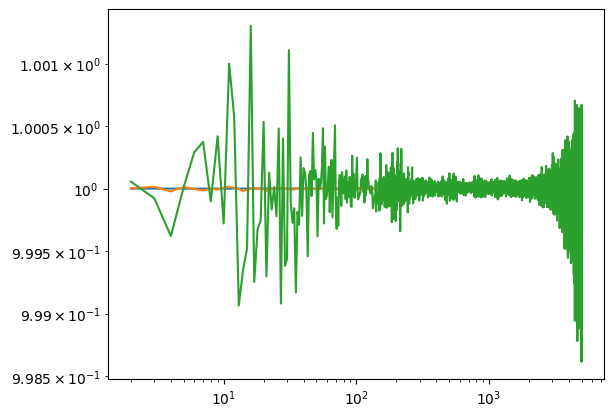

In [24]:
#plt.loglog(hp.alm2cl(elm))
plt.loglog(hp.alm2cl(elm)/hp.alm2cl(elm_))
plt.loglog(hp.alm2cl(blm)/hp.alm2cl(blm_))

plt.loglog(hp.alm2cl(elm_p)/hp.alm2cl(elm_))

In [45]:
cls_path = opj(os.environ['HOME'], 'fgcmblensing', 'input', 'giulio')
#cls_path = opj("/Users/omard/Downloads/", 'giulio')
cls_len = utils.camb_clfile(opj(cls_path, 'lensedCMB_dmn1_lensedCls.dat'))

In [40]:
params = {
    "output" : " tCl, pCl, lCl, rCl", #lCl, rCl" ,
    "l_max_scalars" : 8000,
    "lensing": 'yes',
    "rotation": 'yes',
    "alpha" : 0.,
    "A_cb" : 1E-7,
    "omega_b" : 0.022445,
    "omega_cdm" : 0.1212,
    "h" : 0.67,
    "n_s" : 0.96,
    "A_s" : 2.1265e-09
}

cosmo = Class()
cosmo.set(params)
cosmo.compute(level=['rotation'])

raw_cls = cosmo.raw_cl()
lensed_cls = cosmo.lensed_cl()
rotated_lensed_cls = cosmo.rotated_cl()

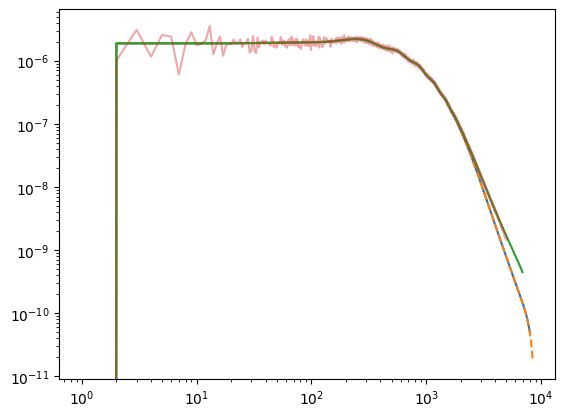

In [50]:
Tcmb = 2.72e6

bmode = True
key = "bb" if bmode else "ee"
x = blm if bmode else elm

plt.loglog(rotated_lensed_cls[key]*Tcmb**2)

plt.loglog(lensed_cls[key]*Tcmb**2, ls = "--")

plt.plot(cls_len[key])

#plt.loglog(lensed_cls["bb"])
#plt.loglog(raw_cls[key]*Tcmb**2)
plt.plot(hp.alm2cl(x), alpha = 0.4)

/tmp/ipykernel_10594/49678154.py:4: RuntimeWarning: invalid value encountered in divide
  plt.plot(hp.alm2cl(x)/cls_len[key][:5001], alpha = 0.4)


(0.9, 1.1)

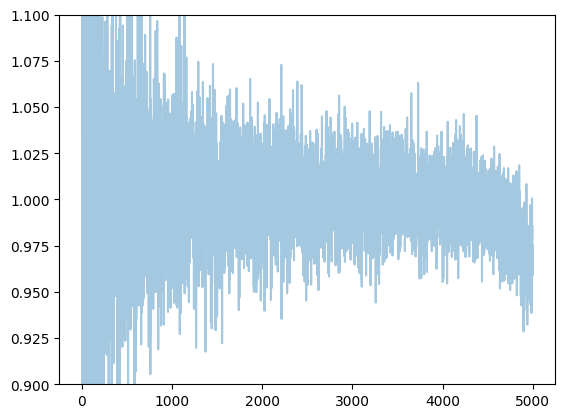

In [54]:


bmode = False
key = "bb" if bmode else "ee"
x = blm if bmode else elm
plt.plot(hp.alm2cl(x)/cls_len[key][:5001], alpha = 0.4)
plt.ylim(0.9, 1.1)

/tmp/ipykernel_10594/1349330736.py:1: RuntimeWarning: invalid value encountered in divide
  plt.loglog(rotated_lensed_cls[key]/lensed_cls[key][:4001])


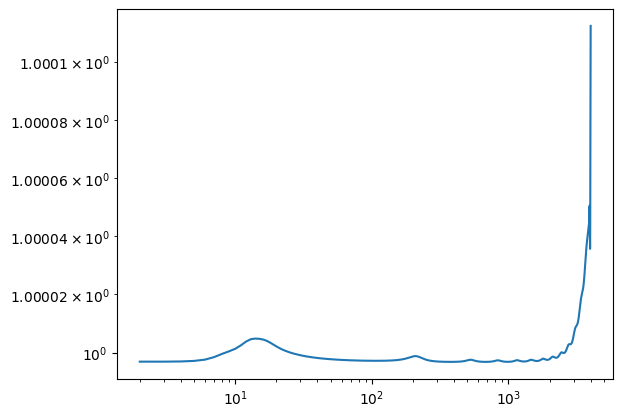

In [33]:
plt.loglog(rotated_lensed_cls[key]/lensed_cls[key][:4001])